In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets


## Quick look at the Data Structure

In [3]:
df = pd.read_csv('noshowappointments/KaggleV2-May-2016.csv')
df_copy = df[:]

In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:

print(f'Dataset has {df.shape[0]} rows and {df.shape[1]} columns')

print(f'We see that one person has more then one appoitment, bacause we have {df.shape[0]} appointments and only {len(df.PatientId.unique())} persons')

len(df.AppointmentID.unique())
print('Appitment ID is unique. For every apoitnment we have new number. We can use this number in index')

Dataset has 110527 rows and 14 columns
We see that one person has more then one appoitment, bacause we have 110527 appointments and only 62299 persons
Appitment ID is unique. For every apoitnment we have new number. We can use this number in index


In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Age column
- min is -1 what means that here we have some mistake
- max value is 115. We can drop all values which are more then 100


## Create a test set
before we start to discover and visualize the data

In [7]:
target = df['No-show']
df1 = df.drop('No-show',axis=1)


In [8]:
#if 'No-show' in df1:
#    print(True)
#else:
#    print(False)
    
np.isin('No-show',df1.columns)

array(False)

### whole set

In [9]:
sampling_bias_comparision = pd.DataFrame()
whole_set_gender = df1.Gender.value_counts()/len(df1)
sampling_bias_comparision['overall_gender'] = whole_set_gender

sampling_bias_comparision_target = pd.DataFrame()
sampling_bias_comparision_target['target_oberall'] = target.value_counts()/len(target)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(df1,target,test_size=0.33,random_state=42,stratify = target)

In [11]:
X_train_1, X_test_1, y_train_1, y_test_1  = train_test_split(df1,target,test_size=0.33,random_state=42,stratify = target)

In [12]:
print(f'Train set with attributes has {X_train.shape[0]} rows and Test set has {X_test.shape[0]} rows')

Train set with attributes has 74053 rows and Test set has 36474 rows


In [13]:
sampling_bias_comparision['train_test_split_gender_TRAIN'] = X_train.Gender.value_counts()/len(X_train)
sampling_bias_comparision['train_test_split_gender_TEST'] = X_test.Gender.value_counts()/len(X_test)

sampling_bias_comparision_target['train_test_split_target_TRAIN'] = y_train.value_counts()/len(y_train)
sampling_bias_comparision_target['train_test_split_target_TEST'] = y_test.value_counts()/len(y_test)

sampling_bias_comparision_target['train_test_split_target_TRAIN_1'] = y_train_1.value_counts()/len(y_train_1)
sampling_bias_comparision_target['train_test_split_target_TEST_1'] = y_test_1.value_counts()/len(y_test_1)

In [14]:
sampling_bias_comparision

,overall_gender,train_test_split_gender_TRAIN,train_test_split_gender_TEST
F,0.649977,0.651655,0.64657
M,0.350023,0.348345,0.35343


In [15]:
sampling_bias_comparision_target

,target_oberall,train_test_split_target_TRAIN,train_test_split_target_TEST,train_test_split_target_TRAIN_1,train_test_split_target_TEST_1
No,0.798067,0.798064,0.798075,0.798064,0.798075
Yes,0.201933,0.201936,0.201925,0.201936,0.201925


### target set balance

In [16]:
percent_YES_train = y_train.value_counts()[1]/y_train.value_counts().sum()
percent_YES_test = y_test.value_counts()[1]/y_test.value_counts().sum()
print('We have ca. 20% YES and 80% NO in both sets')

We have ca. 20% YES and 80% NO in both sets


### gander balanced sets

In [17]:
X_train.Gender.value_counts()
percent_Woman_train = round(X_train.Gender.value_counts()/X_train.Gender.value_counts().sum()*100)
percent_Woman_test = round(X_test.Gender.value_counts()/X_test.Gender.value_counts().sum()*100)

print('Our train and test sets with attributes have 65% woman in both of them')
percent_Woman_train 

Our train and test sets with attributes have 65% woman in both of them


F    65.0
M    35.0
Name: Gender, dtype: float64

## stratified suffle split 

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

for train_index,test_index in split.split(df1,target):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train_s, X_test_s = df1.iloc[train_index], df1.iloc[test_index]
    y_train_s, y_test_s = target[train_index], target[test_index]

In [19]:
sampling_bias_comparision['StratifiedShufflesplit_TRAIN'] = X_train_s.Gender.value_counts()/len(X_train_s)
sampling_bias_comparision['StratifiedShufflesplit_TEST'] = X_test_s.Gender.value_counts()/len(X_test_s)

sampling_bias_comparision_target['StratifiedShufflesplit_target_TRAIN'] = y_train_s.value_counts()/len(y_train_s)
sampling_bias_comparision_target['StratifiedShufflesplit-taget_TEST'] = y_test_s.value_counts()/len(y_test_s)

sampling_bias_comparision_target

,target_oberall,train_test_split_target_TRAIN,train_test_split_target_TEST,train_test_split_target_TRAIN_1,train_test_split_target_TEST_1,StratifiedShufflesplit_target_TRAIN,StratifiedShufflesplit-taget_TEST
No,0.798067,0.798064,0.798075,0.798064,0.798075,0.798068,0.798064
Yes,0.201933,0.201936,0.201925,0.201936,0.201925,0.201932,0.201936


In [20]:
print(f'We have {round(X_train_s.Gender.value_counts()[0]/X_train_s.Gender.value_counts().sum()*100,2)}% of woman in train dataset and {round(X_test_s.Gender.value_counts()[0]/X_test_s.Gender.value_counts().sum()*100,2)}% of woman in test dataset')

We have 65.08% of woman in train dataset and 64.67% of woman in test dataset


## Change data typ

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#we don't have null entries 

PatientID should be int64
Gender should be int64
ScheduledDay & AppointmentDay should be datetime
'No-show','Neighbourhood','Gender' are a string

### binary string to binary number

In [44]:
str_to_int = ['Gender','No-show']

def change_str_to_int(df,list_of_col):
    for col in list_of_col:
        encoded, categories = pd.factorize(df[col])
        df[col]= encoded
    return df, categories,encoded

In [47]:
df, categories,encoded = change_str_to_int(df,str_to_int)

In [48]:
encoded

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null int64
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null int64
dtypes: float64(1), int64(10), object(3)
memory usage: 11.8+ MB


### object for a date to datetime

In [25]:
obj_date_to_datetime = ['ScheduledDay','AppointmentDay']

def obj_to_datetime(df, list_of_col):
    df[list_of_col] = df[list_of_col].apply(pd.to_datetime)
    return df
df = obj_to_datetime(df, obj_date_to_datetime)        

### one hot enconding

In [26]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
neighbourhood_encoded = encoder.fit_transform(df.Neighbourhood.values.reshape(-1,1))


In [27]:
one_hot_col = pd.DataFrame(neighbourhood_encoded.toarray(),columns=encoder.categories_)
len(one_hot_col.columns)

81

In [28]:
df_x = pd.concat([df,one_hot_col],axis=1)
len(df_x.columns)

95

In [29]:
df_merge = df.merge(one_hot_col,how='outer',left_index=True,right_index=True,suffixes=(False,False))


In [30]:
import sklearn
sklearn.__version__


'0.21.2'

In [31]:
((df_merge == df_x).sum()<110527).sum()

0

## Plan the analysis

1. correlaction gander vs target
2. correlation diffrence time sheduled and appoitment vs target
3. correlation appoitment hour vs target
4. correlation appoitment day vs target
5. correlation SMS vs target
6. correlation scholarship vs target
7. correlation age and gender vs target
8. correlation illnes (diabetes or alcoholism) vs target
9. plot gender vs age vs target
10. when the woman booked and when the men


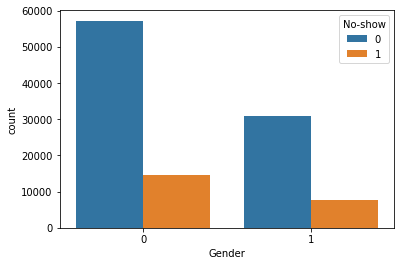

In [41]:
import seaborn as sns
sns.countplot(x="Gender", hue="No-show", data=df_x)

In [63]:
df_x.Gender[df_x['No-show']==0].value_counts()/df_x.Gender.value_counts()

0    0.796854
1    0.800321
Name: Gender, dtype: float64

In [64]:
df_x.Gender[df_x['No-show']==1].value_counts()/df_x.Gender.value_counts()

0    0.203146
1    0.199679
Name: Gender, dtype: float64

In [77]:
df_x.groupby('No-show')['Gender'].value_counts()

No-show  Gender
0        0         57246
         1         30962
1        0         14594
         1          7725
Name: Gender, dtype: int64

In [62]:
from sklearn.metrics import matthews_corrcoef
sklearn.metrics.matthews_corrcoef(df_x.Gender,df_x['No-show'])

-0.004118633199373624

correlation diffrence time sheduled and appoitment vs target

In [82]:
from sklearn.metrics import matthews_corrcoef
sklearn.metrics.matthews_corrcoef(df_x.Hipertension,df_x.Diabetes)

0.43308564177232606

## Discover and Visualize the Data 

In [ ]:
X_train.PatientId.value_counts().head(20).hist()

In [ ]:
X_train.PatientId.value_counts().head(20)

In [ ]:
sns.distplot(X_train.PatientId.value_counts().head(20),kde=False,bins=10)

It is a supervised problem because we have data with labels. We will be do binary classification